In [129]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.spatial import KDTree

# Coords = (x, y, z, t, ring)
# ring means the channel (0 - 127)
# Coords (0, 0, 0) with range 0 are points that the LiDAR did not measure, so we should drop it.

points = pd.read_csv('/home/eder/projects/car-cluster-project/Data/1_coche.csv', sep=',')
road = pd.read_csv('/home/eder/projects/car-cluster-project/Data/carretera.csv', sep=',')

In [130]:
points = points[points["range"] != 0].reset_index()
road = road[road["range"] != 0].reset_index()

In [131]:
fig = px.scatter_3d(points, x='x', y='y', z='z', color='intensity', title='Puntos LiDAR - Todos los canales (3D)', labels={'x':'Coordenada X (metros)', 'y':'Coordenada Y (metros)', 'z':'Coordenada Z (metros)', 'intensity':'Intensidad'})
fig.update_traces(marker=dict(size=2))
fig.show()

In [132]:
points2 = points[["x", "y", "z"]].astype(np.float32).values
road2 = road[["x", "y", "z"]].astype(np.float32).values

In [133]:
tree = KDTree(points2)
distances, indices = tree.query(road2,k=6)

In [134]:
indices.size

343902

In [135]:
median = np.median(distances)
variance = np.var(distances)
max_distance = median + variance
f'{median=}, {variance=}, {max_distance=}'

'median=np.float64(0.08940244448629822), variance=np.float64(0.19840468283817414), max_distance=np.float64(0.28780712732447233)'

(array([[5.5494e+04, 1.4590e+03, 3.4900e+02, 3.0000e+00, 1.0000e+00,
         1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
         3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0

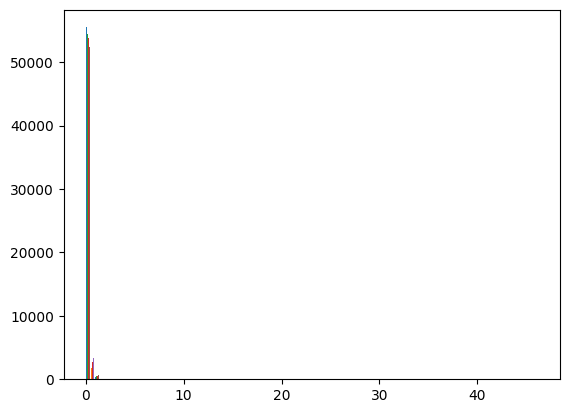

In [136]:
plt.hist(distances, bins=100)

In [137]:
#indices = indices[distances < median]

In [138]:
indices.size

343902

In [139]:
points.shape

(57047, 10)

In [140]:
points = points[~points.index.isin(np.unique(indices))]

In [141]:
points.shape

(3049, 10)

In [142]:
fig = px.scatter_3d(points, x='x', y='y', z='z', color='intensity', title='Puntos LiDAR - Todos los canales (3D)', labels={'x':'Coordenada X (metros)', 'y':'Coordenada Y (metros)', 'z':'Coordenada Z (metros)', 'intensity':'Intensidad'})
fig.update_traces(marker=dict(size=2))
fig.show()